### Improving Computer Vision Accuracy using Convolutions

The main concept of convolutions is that they narrow down the content of the image to focus on specific parts.

In [21]:
#importing libraries

import tensorflow as tf
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.mnist.load_data()
print(f"Shape of the training image is: {train_images[0].shape}")

Shape of the training image is: (28, 28)


In [22]:
#defining the model

model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation="sigmoid")

    ]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [24]:
print("MODEL TRAINING:\n")
model.fit(train_images, train_labels, epochs=5)

MODEL TRAINING:

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9524 - loss: 0.2478
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9816 - loss: 0.0631
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9854 - loss: 0.0471
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9868 - loss: 0.0408
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9879 - loss: 0.0332


In [25]:
print("MODEL EVALUATION:\n")
test_loss, test_accuracy=model.evaluate(test_images, test_labels)
print(f"Test set accuracy: {test_accuracy}")
print(f"Test set loss: {test_loss}")

MODEL EVALUATION:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.0486
Test set accuracy: 0.9872999787330627
Test set loss: 0.04856064170598984


#### Visualizing the Convolutions and Pooling

In [26]:
print(f"First 100 labels:\n\n{test_labels[:100]}")

print(f"\n Number 2 indexes: {[i for i in range(100) if test_labels[:100][i]==2]}")

First 100 labels:

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]

 Number 2 indexes: [1, 35, 38, 43, 47, 72, 77, 82]


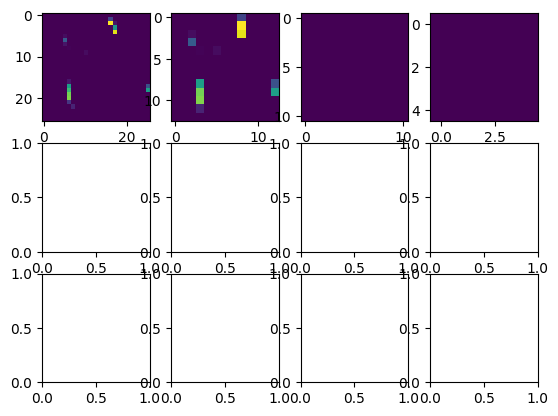

In [36]:
first_image = test_images[1]
second_image = test_images[35]
third_image = test_images[38]

layers_to_visualize = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D]

layer_outputs = [layer.output for layer in model.layers if type(layer) in layers_to_visualize]
activation_models = tf.keras.models.Model(inputs = model.inputs, outputs = layer_outputs)

plt.subplots(3, len(layer_outputs))

for x in range(len(layer_outputs)):
    f1 = activation_models.predict(test_images[1].reshape(1,28,28,1), verbose=False)[x]
    plt.subplot(3, len(layer_outputs), x+1)
    plt.imshow(f1[0, :, :, 1])
    
